In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns 
#import bamboolib

In [2]:
import os
current_directory = os.getcwd()
print("Current directory : ", current_directory)

aymeric =  "/home/aymeric/python-scripts/espadon/data/" #aymeric
jp = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
jp_index = '~/Dropbox/Mac/Desktop/CRD Anses/code/indexation_results/' # Jean Philippe index

if 'aymeric' in current_directory:
    path_base = aymeric

elif 'Mac' in current_directory:
    path_base = jp
elif 'd:/Projects' in current_directory:
    path_base = "d:/Projects/Medialab/"

print("Path base : ", path_base)

Current directory :  /home/aymeric/python-scripts/espadon/my-espadon-notebook
Path base :  /home/aymeric/python-scripts/espadon/data/


In [3]:
dic_id={}
for x in [x for x in pd.read_csv(glob.glob(f'{path_base}sm/*.csv')[0]).columns if 'id' in x]:
    dic_id[x]=str


In [4]:
df0= pd.read_csv(f"{path_base}verified_corpus_with_users_features.csv", sep = ",", dtype = dic_id)

/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Analyse des hashtags

In [5]:
list_of_hashtag = ['adcsm', 'amsm', 'ancsm', 'ayacsm', 'bcsm', 'blcsm', 'btsm', 'crcsm', 'esocsm', 'gencsm', 'gyncsm', 'hncsm', 'hpbcsm', 'kcsm', 'lcsm', 'leusm', 'lymsm', 'melsm', 'mmsm', 'mpnsm', 'pancsm', 'pedcsm', 'pcsm', 'scmsm', 'skcsm', 'stcsm', 'thmcsm', 'thycsm', 'tscsm']

In [6]:
df_h = df0.loc[(df0["hashtags"].isin(list_of_hashtag)) &(~df0["User_status"].isnull())]

In [7]:
df_h = df_h[["id", "user_id", "user_screen_name","User_status", "hashtags"]]

for h in list_of_hashtag:
    df_h[h] = df_h["hashtags"].str.count(h)
    

In [8]:
df_h_status = df_h[["User_status"]].drop_duplicates()

In [9]:

list_h = []
list_count_h = []
for h in list_of_hashtag:
    list_h.append(h)
    list_count_h.append(sum(df_h[h]))
    

In [10]:
dict_hashtag = {"hashtag" : list_h, "count_h": list_count_h}
count_h = pd.DataFrame(data = dict_hashtag)
count_h["freq_h"] = (count_h["count_h"]/ sum(count_h["count_h"]))*100
count_h["log_h"] = np.log(count_h["count_h"])
count_h = count_h.sort_values('freq_h', ascending = False)


In [11]:
fig = px.bar(count_h, x='count_h', y='hashtag',
            title = "Nombre de tweets par hashtags")
fig.show()

<AxesSubplot:xlabel='count_h', ylabel='hashtag'>

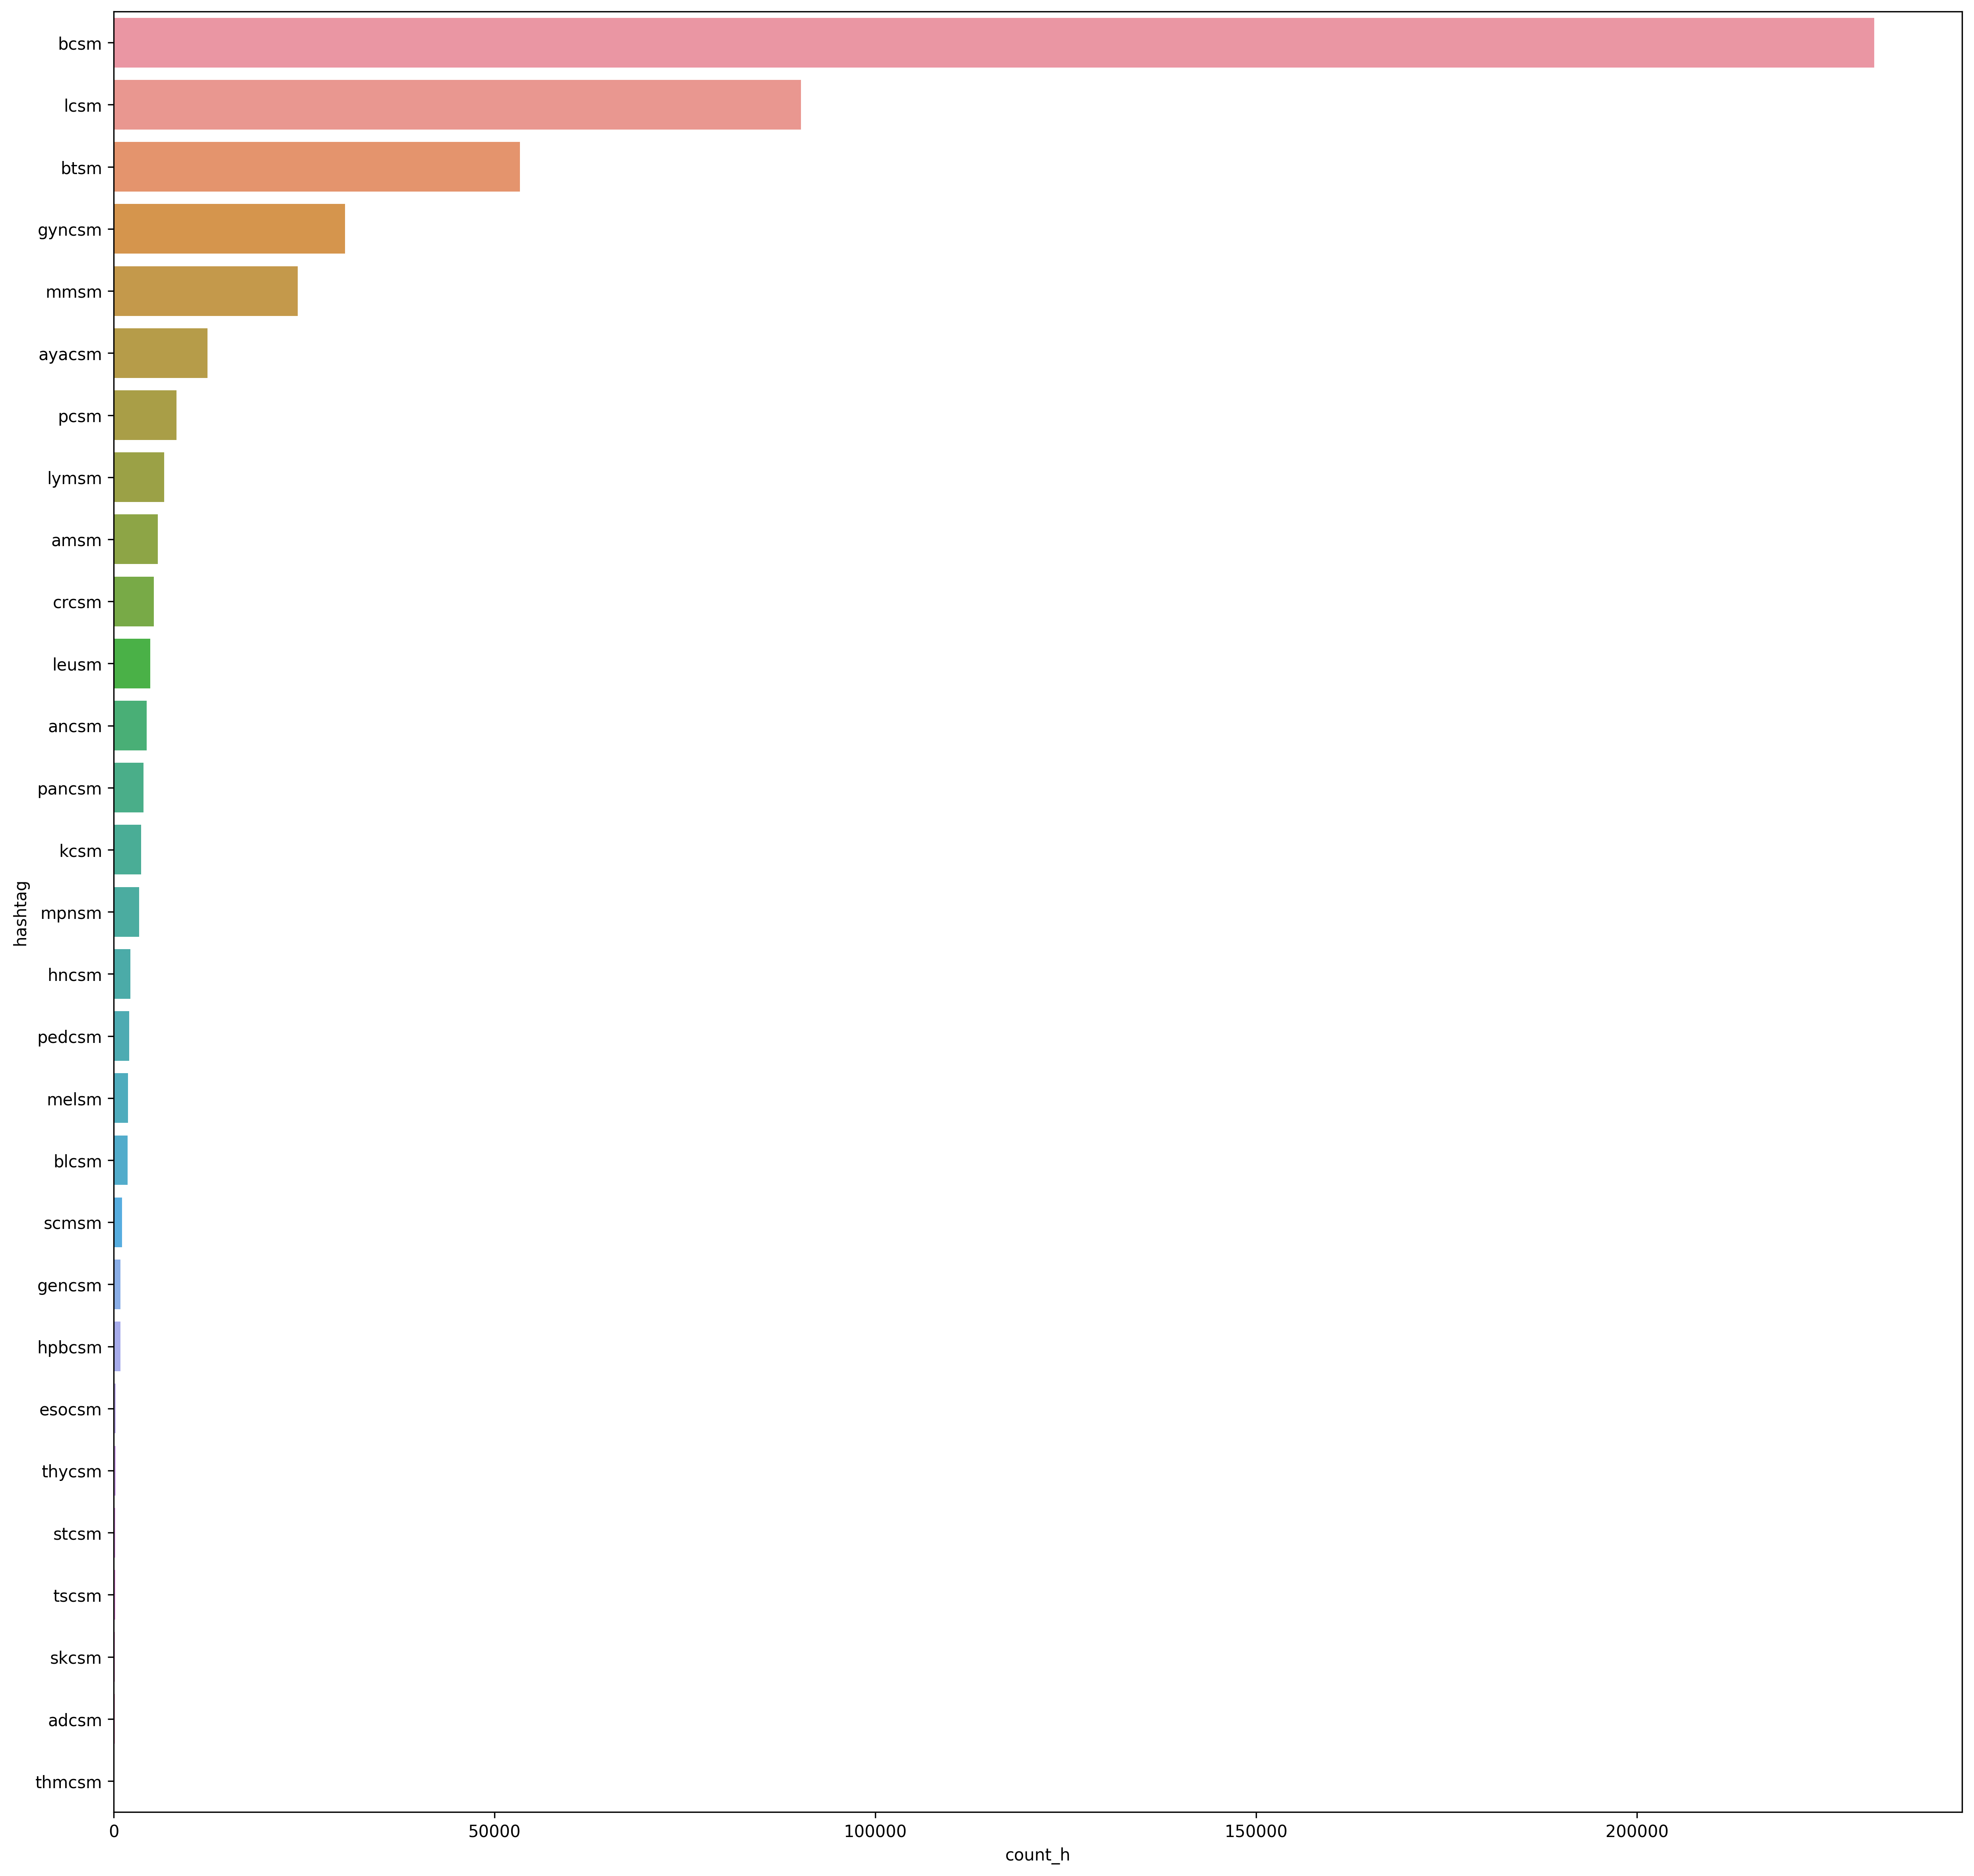

In [12]:
fig = plt.figure(num=None, figsize=(20, 20), dpi=300, facecolor='w', edgecolor='k')
sns.barplot(x=count_h["count_h"], y=count_h["hashtag"])

In [13]:
list_h = []
list_count_h = []
for i, h in enumerate(list_of_hashtag):
    if i== 0:
        stat_count_h = df_h.groupby(["User_status"]).agg(count_hash=(h,"sum")).reset_index()
        stat_count_h["hashtag"] = h
        stat_count_h["total_h"] = np.sum(stat_count_h["count_hash"])
        stat_count_h["freq_h"] = (stat_count_h["count_hash"]/np.sum(stat_count_h["count_hash"]))*100
    else:
        size_h = df_h.groupby(["User_status"]).agg(count_hash=(h,"sum")).reset_index()
        size_h["hashtag"] = h
        size_h["total_h"] = np.sum(size_h["count_hash"])
        size_h["freq_h"] = (size_h["count_hash"]/np.sum(size_h["count_hash"]))*100
        stat_count_h = pd.concat([stat_count_h, size_h])
        

In [14]:
h_count_stat = stat_count_h.groupby(["User_status"]).agg(total_stat=('count_hash',"sum")).reset_index()


In [15]:
stat_count_h = stat_count_h.merge(h_count_stat, on = ["User_status"], how = "left").reset_index()
stat_count_h["freq_stat"] = (stat_count_h["count_hash"]/stat_count_h["total_stat"])*100

In [16]:

pivot_table = stat_count_h[["User_status", "hashtag", "freq_h"]]
pivot_table = pivot_table.pivot(index='User_status', columns='hashtag', values='freq_h').reset_index()
pivot_table.columns.name = ''
pivot_table.index =  pivot_table["User_status"]
pivot_table = pivot_table.drop(columns= ["User_status"])


[Text(0.5, 1.0, 'Contribution des catégories pour chacun des hashtags (% en colonne)')]

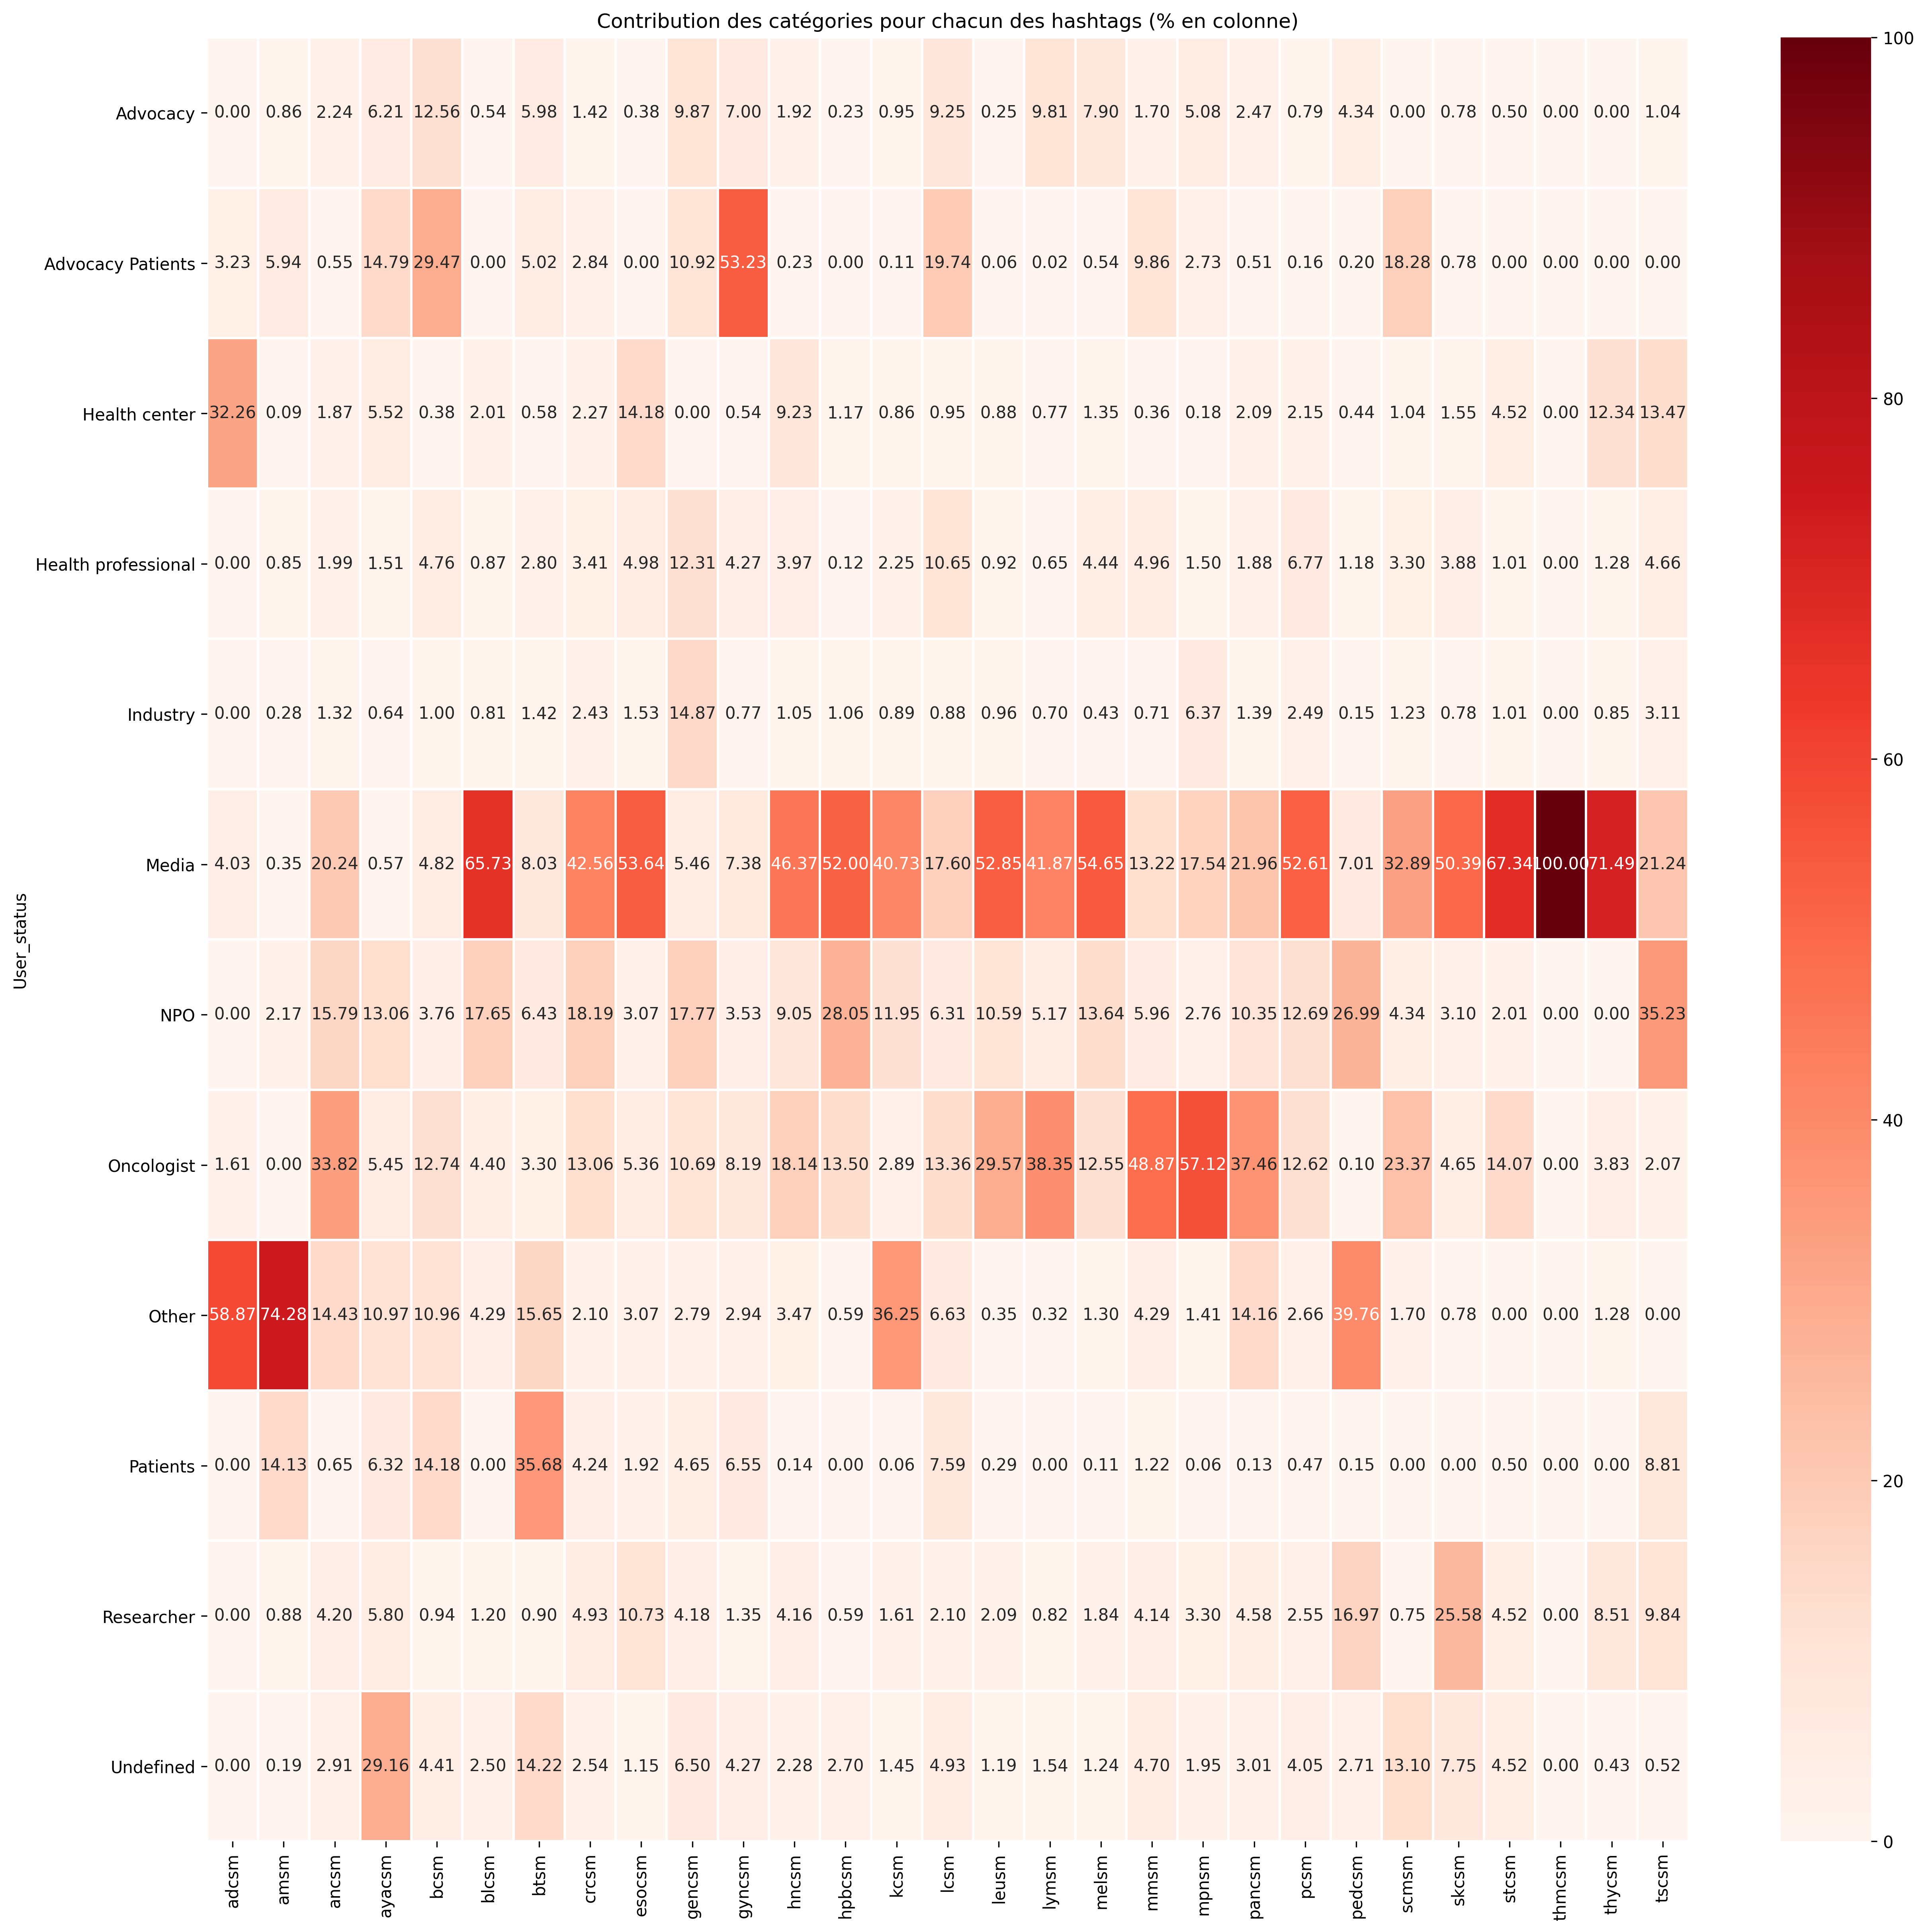

In [17]:

fig = plt.figure(num=None, figsize=(20, 20), dpi=300, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(pivot_table, annot=True, linewidths=1, fmt='.2f',  cmap="Reds")
res.set(title ="Contribution des catégories pour chacun des hashtags (% en colonne)")


In [18]:
fig = px.imshow(pivot_table, color_continuous_scale='Reds', 
               title = "Contribution des catégories pour chacun des hashtags (% en colonne)" )
fig.update_xaxes(side="top")
fig

[Text(0.5, 1.0, 'Part des hashtags dans les tweets de chacune des catégories (% en ligne)')]

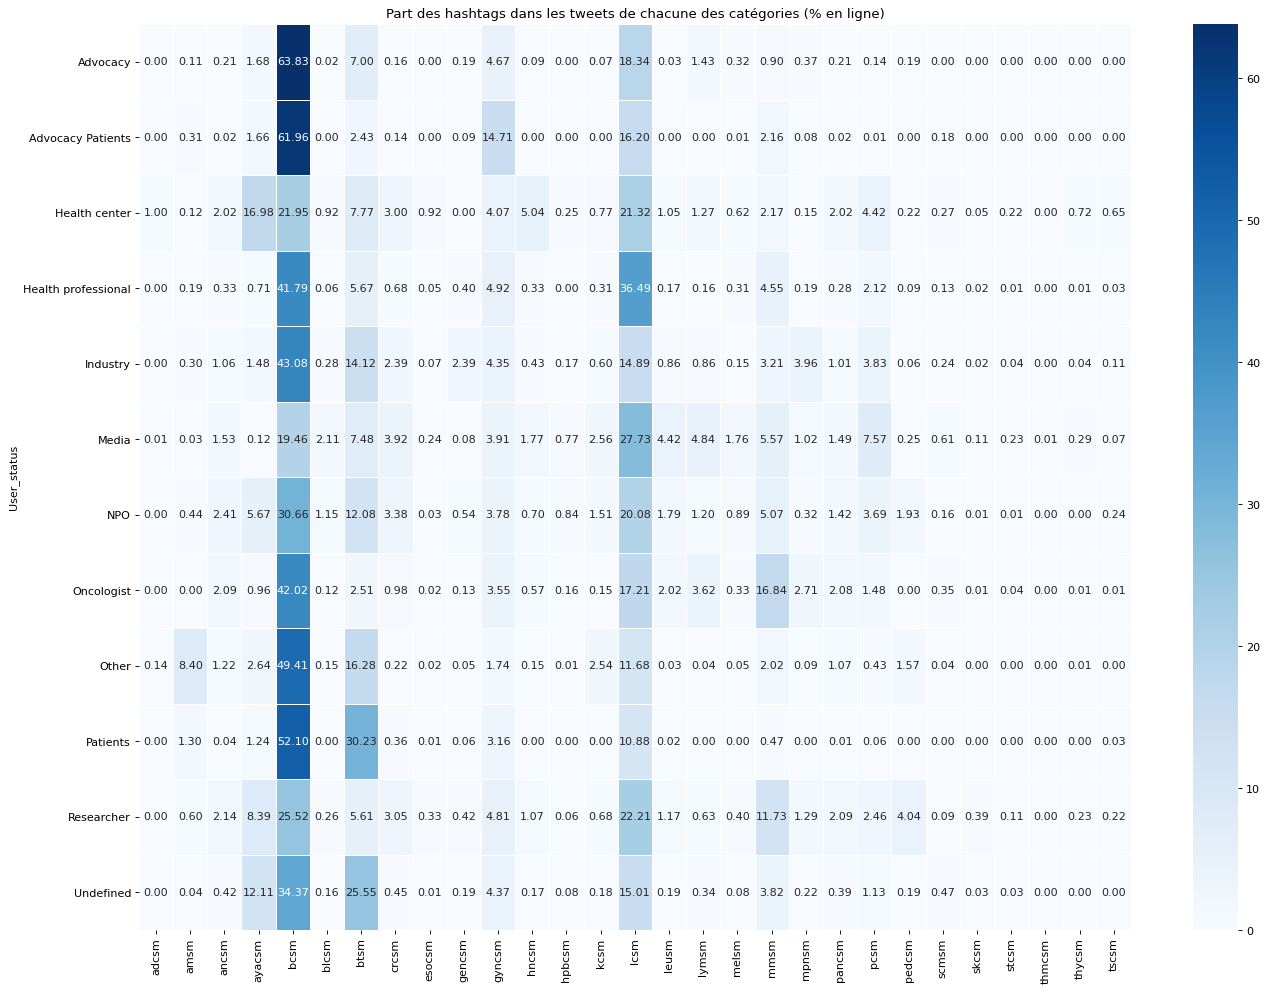

In [19]:
pivot_table2 = stat_count_h[["User_status", "hashtag", "freq_stat"]]
pivot_table2 = pivot_table2.pivot(index='User_status', columns='hashtag', values='freq_stat').reset_index()
pivot_table2.columns.name = ''
pivot_table2.index =  pivot_table2["User_status"]
pivot_table2 = pivot_table2.drop(columns= ["User_status"])

fig = plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(pivot_table2, annot=True, linewidths=.5, fmt='.2f',  cmap="Blues")

res.set(title ="Part des hashtags dans les tweets de chacune des catégories (% en ligne)")

In [20]:
fig = px.imshow(pivot_table2, color_continuous_scale='Blues', title='Part des hashtags dans les tweets de chacune des catégories (% en ligne)')
fig.update_xaxes(side="top")
fig

In [21]:
pivot_table3 = stat_count_h[["User_status", "hashtag", "count_hash"]]
pivot_table3 = pivot_table3.pivot(index='User_status', columns='hashtag', values='count_hash').reset_index()
pivot_table3.index =  pivot_table3["User_status"]
pivot_table3 = pivot_table3.drop(columns= ["User_status"])
pivot_table3['somme_ligne']= pivot_table3.sum(numeric_only=True, axis=1)
pivot_table3.loc['Column_total']= pivot_table3.sum(numeric_only=True, axis=0)

In [22]:
pivot_table3 =pivot_table3.reset_index()

In [23]:
list_status = []
#col = biom.append("User_status")
#dft = pd.DataFrame(columns = [biom])
dict_score = {}

for h in list_of_hashtag:
    list_score = []
    for i, x in enumerate(pivot_table3[h]):
        n = pivot_table3["somme_ligne"].iloc[i] #total tweets of the status with hashtags
        m = pivot_table3[h].iloc[-1] #total tweets mentionning the hashtag h
        total = pivot_table3["somme_ligne"].iloc[-1] # total of tweets mentionning an hashtag
        a = x
        b = n-x
        c= m-x
        d = (total-n)-(c)
        numerateur = (a*d)-(b*c)
        denominateur_a = n*m
        denominateur_b = (total-n)*(total-m)
        denominateur_c = np.sqrt(denominateur_a)*np.sqrt(denominateur_b)
        denominateur = denominateur_c
        np.seterr(divide='ignore', invalid='ignore')
        phi_score = np.divide(numerateur, denominateur)
        #phi_score2 = ((a)) / np.sqrt(n*m)
        chi_square_value = total*np.square(phi_score)
        normalised_score = x/(n*m)

        if chi_square_value > 6.6349:
            list_score.append(phi_score)
        else:
            list_score.append(np.nan)
        dict_score[h] = list_score

for x in pivot_table3["User_status"]:
        list_status.append(x)
        dict_score["User_status"] = list_status


In [24]:
dft = pd.DataFrame(dict_score)
dft.index = dft["User_status"]
dft = dft.drop(columns=["User_status"])
dft = dft.drop(labels=["Column_total"])

[Text(0.5, 1.0, 'Corrélation entre hashtags et statuts (coefficient de Phi)')]

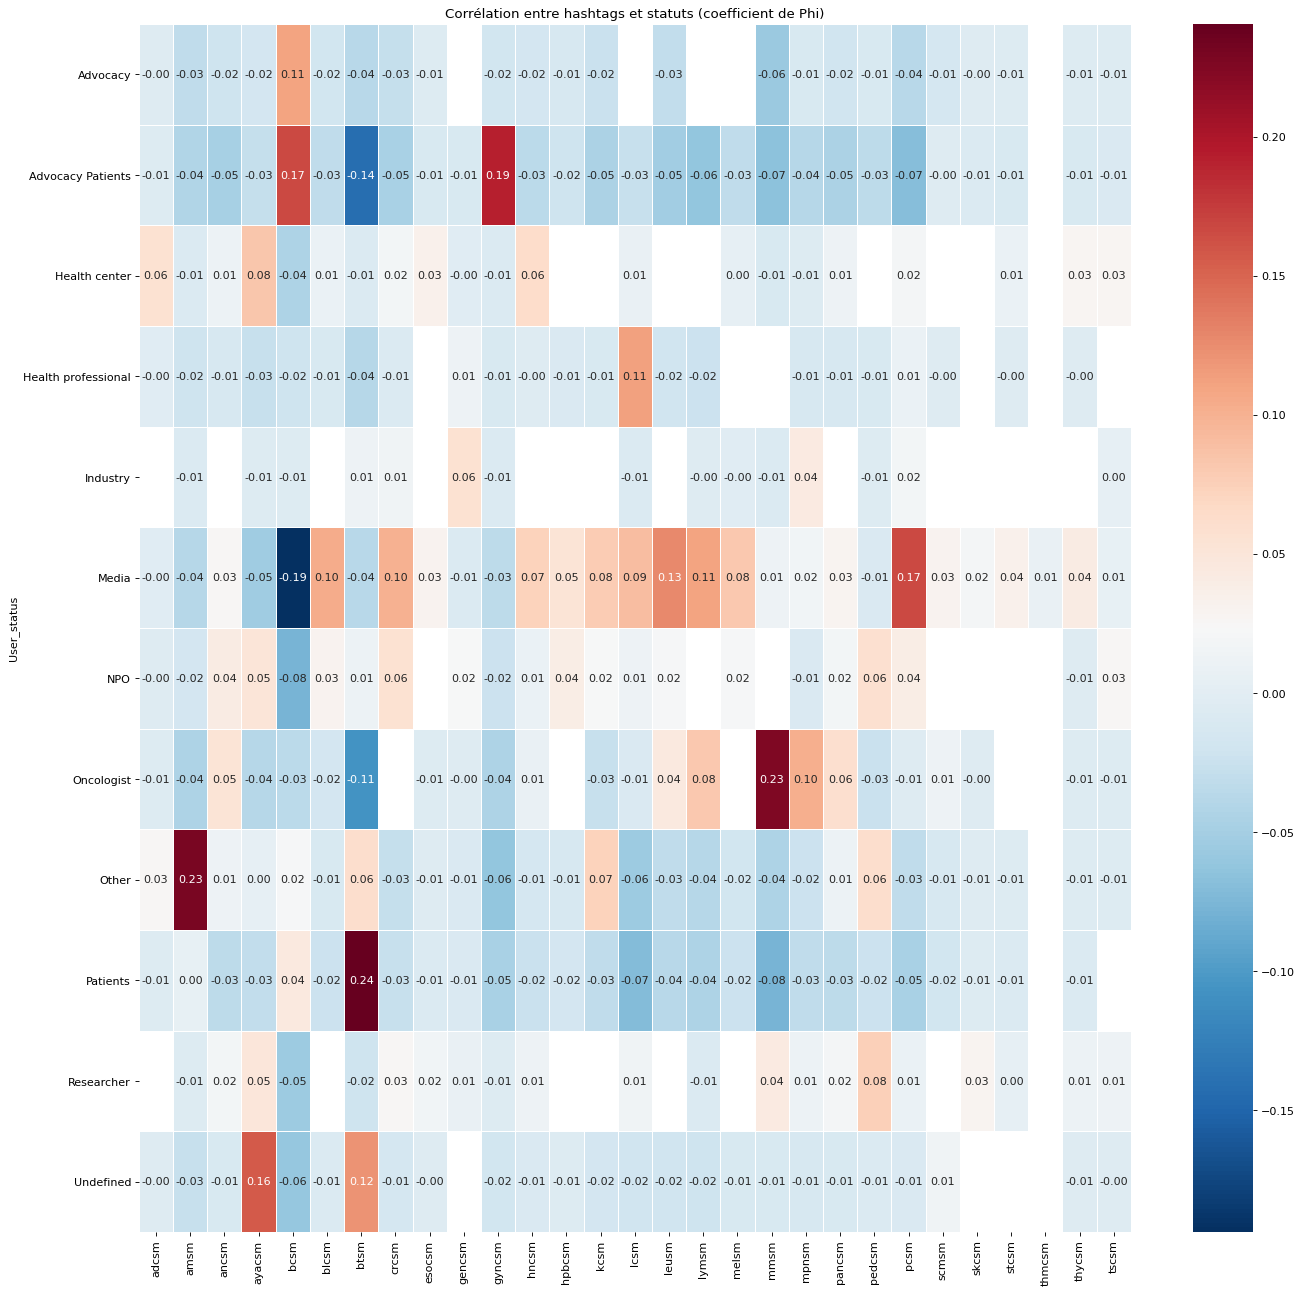

In [25]:
fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(dft, annot=True, linewidths=.5, fmt='.2f',  cmap="RdBu_r")


#plt.savefig('biomarkers_dist.pdf')
res.set(title ="Corrélation entre hashtags et statuts (coefficient de Phi)")

In [26]:
fig = px.imshow(dft, color_continuous_scale='RdBu_r',
               title = "Corrélation entre hashtags et statuts (coefficient de Phi)" )
fig.update_xaxes(side="top")
fig